<h3>Описание данных</h3>
Имеются следующие поля:
<ol type = "1">
<li>Rank – место по объему продаж</li>
<li>Name – название игры</li>
<li>Platform – платформа, на которой выпущена игра</li>
<li>Year – год релиза</li>
<li>Genre – жанр</li>
<li>Publisher – издатель</li>
<li>NA_Sales – продажи в Северной Америке, в млн.</li>
<li>EU_Sales – продажи в Европе, в млн.</li>
<li>JP_Sales – продажи в Японии, в млн.</li>
<li>Other_Sales – продажи в остальном мире, в млн.</li>
<li>Global_Sales – продажи по всему миру, в млн.</li>
</ol>

<i><font color="teal">Загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, типы данных, размерность, наличие пропущенных значений.</font></i>

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
games = pd.read_csv('games.csv')

In [6]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [23]:
games['Year'] = games.Year.astype('Int64')

In [24]:
games.shape

(16598, 11)

In [25]:
games.dtypes

Rank              int64
Name             object
Platform         object
Year              Int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [26]:
games.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

<i><font color="teal">Выведите описательные характеристики переменной Year и постройте график распределения количества выпущенных игр по годам.</font></i>

In [27]:
games.Year.describe()

count    16327.000000
mean      2006.406443
std          5.828981
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [28]:
games_by_year = games.groupby('Year', as_index=False) \
                     .agg({'Name': 'count'}) \
                     .rename(columns={'Name': 'games_count'})

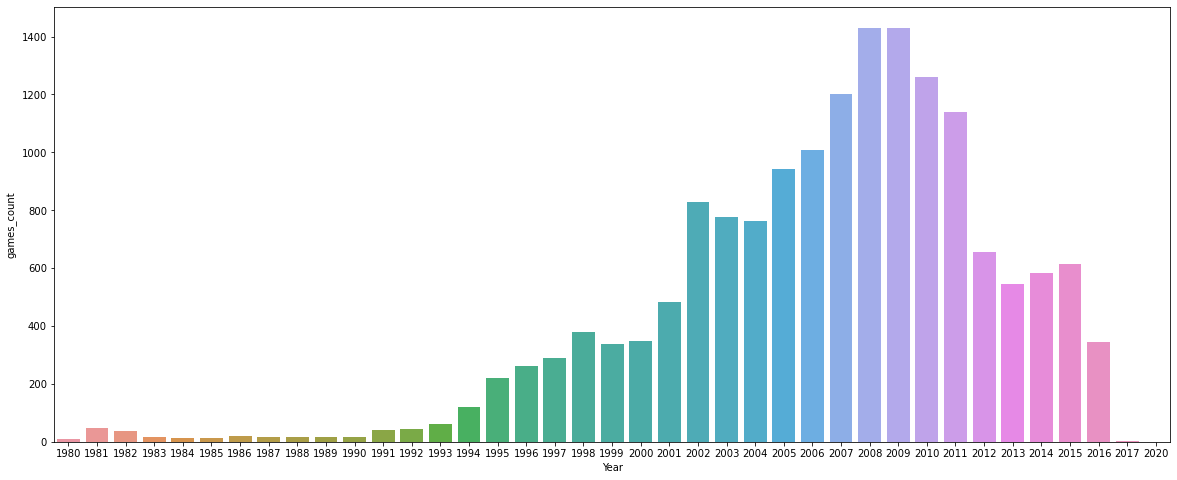

In [29]:
plt.figure(figsize=(20,8))
sns.barplot(x='Year', y='games_count', data=games_by_year)

In [39]:
games.Year.value_counts().head(1) #distribution mode

2009    1431
Name: Year, dtype: Int64

In [53]:
games_by_year.query('Year <= 2007').games_count.sum() / games_by_year.games_count.sum() #half of games published after 2007

0.5097690941385435

<i><font color="teal">На каких платформах произошло больше всего релизов?</font></i>

In [69]:
s = games.Platform.value_counts()
s.where(s > 1162).dropna().index #Оставить названия только тех платформ, частота встречаемости которых составляет более 7%

Index(['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS'], dtype='object')

<i><font color="teal">Игры каких издателей (Publisher) встречаются в датасете чаще всего</font></i>

In [86]:
games_no_na = games.dropna()

In [87]:
games_no_na.Publisher.value_counts() 

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Riverhillsoft                      1
MLB.com                            1
Rain Games                         1
Strategy First                     1
Marvel Entertainment               1
Name: Publisher, Length: 576, dtype: int64

<i><font color="teal">Посчитать среднее, медиану и стандартное отклонение по продажам игр Nintendo в разных регионах (NA, EU, JP, Other).</font></i>

In [90]:
games_no_na.query('Publisher == "Nintendo"').describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,696.000000,696.00000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,3801.864943,2003.83046,1.172055,0.601006,0.653721,0.136767,2.563836
std,3969.268372,7.77637,2.989913,1.743953,1.063110,0.464170,5.676925
min,1.000000,1983.00000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,710.750000,2000.00000,0.010000,0.007500,0.090000,0.000000,0.300000
50%,2262.000000,2005.00000,0.375000,0.120000,0.280000,0.030000,0.920000
75%,5901.750000,2009.00000,0.972500,0.482500,0.740000,0.090000,2.262500
max,16545.000000,2016.00000,41.490000,29.020000,10.220000,8.460000,82.740000


<i><font color="teal">Теперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот, где:</font></i>

<li><i><font color="teal">по оси x будет расположен жанр игры (Genre)</font></i></li>
<li><i><font color="teal">по оси у – объем продаж в Японии (JP_sales)</font></i></li>

In [96]:
games_nintendo = games_no_na.query('Publisher == "Nintendo"')

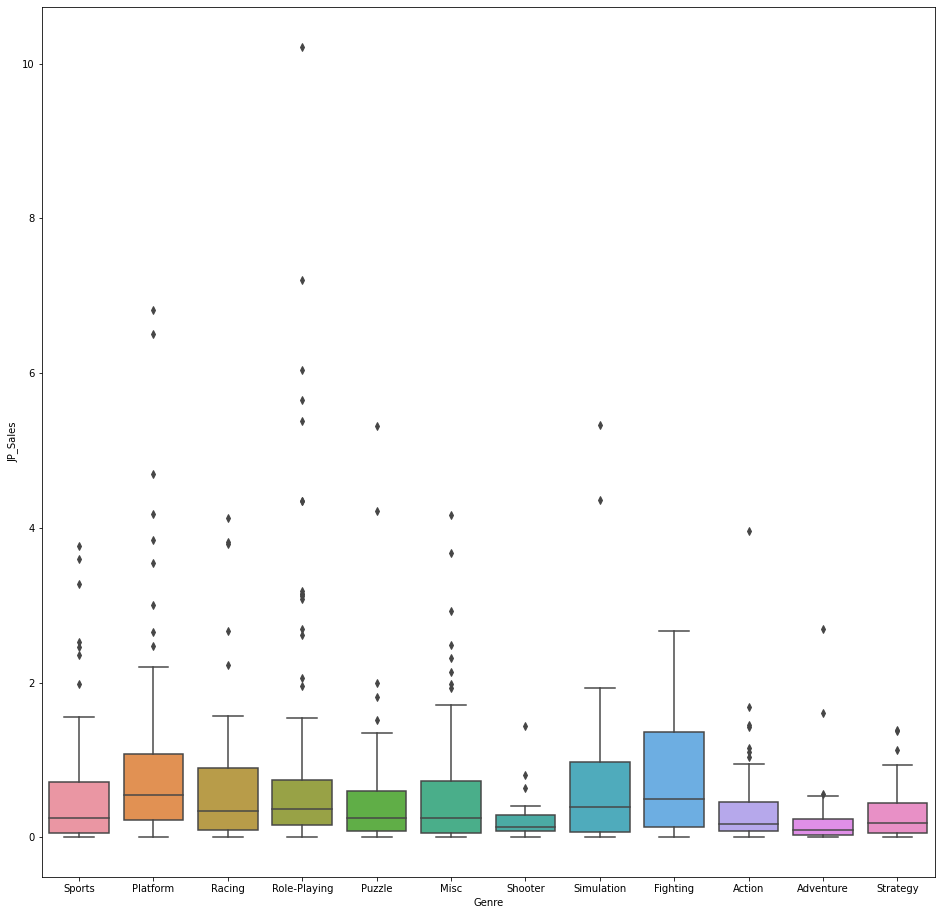

In [98]:
plt.figure(figsize=(16,16))
sns.boxplot(x="Genre", y="JP_Sales", data=games_nintendo)

<i><font color="teal">Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.</font></i>

In [104]:
games_nintendo_year = games_nintendo.query('Genre in ("Fighting", "Simulation", "Platform", "Racing", "Sports")') \
                                    .groupby(['Genre','Year'], as_index=False) \
                                    .agg({'Name': 'count'}) \
                                    .rename(columns={'Name': 'Count'})

In [105]:
games_nintendo_year.head()

,Genre,Year,Count
0,Fighting,1987.0,2
1,Fighting,1993.0,1
2,Fighting,1995.0,1
3,Fighting,1996.0,2
4,Fighting,1999.0,1


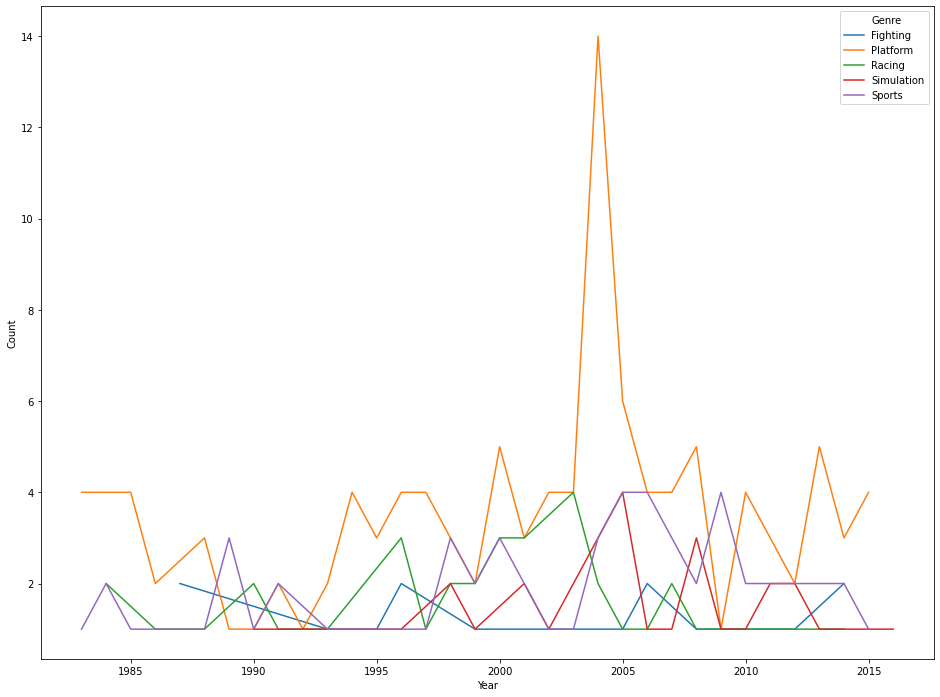

In [109]:
plt.figure(figsize=(16,12))
sns.lineplot(x = 'Year', y = 'Count', hue = 'Genre', data = games_nintendo_year) #.query('Genre == "Sports"')